차원축소를 적용하기 전에 개별 속성에 대해 scaling을 진행해야한다.(각 열에 대해 진행됨)

# [실습] PCA
- PC1 : 72 % , PC2: 22%으로 두개 요소로만 변환해도 원본데이터의 변동성을 95%를 설명핼수 있다. 
- 원본 데이터로 계산한 예측성능 보다 차원축소한 데이터로 계산한 예측성능이 더 떨어진다.

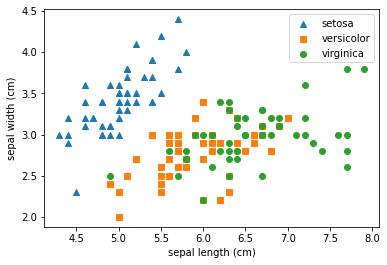

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [ ]:
 from sklearn.datasets import load_iris
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data,columns=iris.feature_names)
irisDF['target'] = iris.target

markers=['^','s','o']
for i,marker in enumerate(markers):
    x = irisDF[irisDF['target']==i]['sepal length (cm)']
    y = irisDF[irisDF['target']==i]['sepal width (cm)']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length (cm)')                
plt.ylabel('sepal width (cm)')                
plt.show()

# PCA를 적용하기 전에 개별 속성에 대해 scaling을 진행해야한다.(각 열에 대해 진행됨)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(irisDF.iloc[:,:-1])
print(irisDF.iloc[:5,:-1])
print(scaled_data[:5])

pca component :  [0.72962445 0.22850762]
        PC1       PC2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0


Text(0, 0.5, 'PC2 :22.85%')

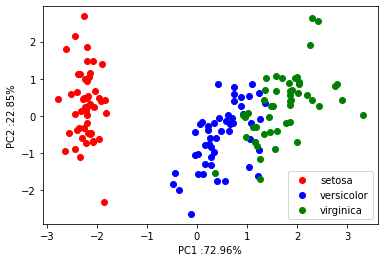

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(scaled_data)
iris_pca= pca.transform(scaled_data)
print('pca component : ',pca.explained_variance_ratio_);print('='*50)

irisDF_pca = pd.DataFrame(data=iris_pca,columns=['PC1','PC2'])
irisDF_pca['target']=iris.target
print(irisDF_pca.head(3))
colors=['red','blue','green']
for i,color in enumerate(colors):
    x = irisDF_pca[irisDF_pca['target']==i]['PC1']
    y = irisDF_pca[irisDF_pca['target']==i]['PC2']
    plt.scatter(x,y,c=color,label=iris.target_names[i])
plt.legend()
plt.xlabel('PC1 :'+str(np.round(pca.explained_variance_ratio_[0]*100,2))+'%')
plt.ylabel('PC2 :'+str(np.round(pca.explained_variance_ratio_[1]*100,2))+'%')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

dt_clf = RandomForestClassifier(n_estimators=100, random_state=0)
scores= cross_val_score(dt_clf,iris.data,iris.target, scoring='accuracy',cv=3)
print('원본 데이터 교차검증 개별 정확도 : ', np.round(scores,2))
print('평균 정확도 : ', np.round(np.mean(scores),2));print('='*50)

scores= cross_val_score(dt_clf,irisDF_pca.iloc[:,:-1],irisDF_pca.target, scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차검증 개별 정확도 : ', np.round(scores,2))
print('평균 정확도 : ', np.round(np.mean(scores),2))


원본 데이터 교차검증 개별 정확도 :  [0.98 0.94 0.98]
평균 정확도 :  0.97
PCA 변환 데이터 교차검증 개별 정확도 :  [0.88 0.88 0.9 ]
평균 정확도 :  0.89


# [실습] LDA
- 클래스 정보가 존재할때 용이
- PCA와 큰 차이없는 결과를 확인

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
scaled_iris =StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(scaled_iris,iris.target)
iris_lda= lda.transform(scaled_iris)
print(iris_lda[:5])
print(lda.explained_variance_ratio_)

[[ 8.06179978  0.30042062]
 [ 7.12868772 -0.78666043]
 [ 7.48982797 -0.26538449]
 [ 6.81320057 -0.67063107]
 [ 8.13230933  0.51446253]]
[0.9912126 0.0087874]


Text(0, 0.5, 'LDA component2')

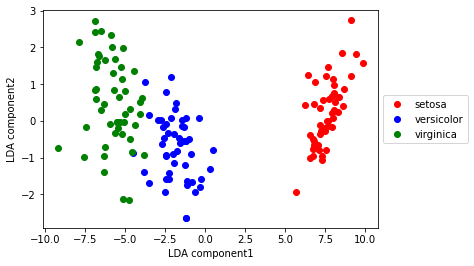

In [17]:
irisDF_lda = pd.DataFrame(iris_lda,columns=['LDA component1','LDA component2'])
irisDF_lda['target'] = iris.target
colors = ['red','blue','green']

for i,color in enumerate(colors):
    x = irisDF_lda[irisDF_lda['target']==i]['LDA component1']
    y = irisDF_lda[irisDF_lda['target']==i]['LDA component2']
    plt.scatter(x,y,c=color,label=iris.target_names[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('LDA component1')
plt.ylabel('LDA component2')


# [실습] SVD
- SVD 분해, 연산 확인
- `Truncated SVD` 일부 상위 특이값을 선택해서 SVD를 실행해보자.

In [4]:
import numpy as np
from numpy.linalg import svd

#랜덤 행렬 A 생성  
np.random.seed(121)
A = np.random.randn(4,4)

# A행렬에 SVD를 적용해 U, sigma, V 도출
U, Sigma,Vt =svd(A)
# Sigma 대각행렬으로 변환 후 U, sigma, Vt 내적
Sigma_mat = np.diag(Sigma)
# A 와 A_가 동일하게 복원됨을 확인
A_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix :\n',U);print('='*50)
print('Sigma matrix :\n',Sigma_mat);print('='*50)
print('V transpose matrix :\n',Vt);print('='*50)
print('A shape {} A_ shape {}'.format(A.shape,A_.shape))
print("A matrix: \n", A);print('='*50)
print("A' matrix: \n", A_)


(4, 4) (4,) (4, 4)
U matrix :
 [[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]
Sigma matrix :
 [[3.4229581  0.         0.         0.        ]
 [0.         2.02287339 0.         0.        ]
 [0.         0.         0.46263157 0.        ]
 [0.         0.         0.         0.07935069]]
V transpose matrix :
 [[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]
A shape (4, 4) A_ shape (4, 4)
A matrix: 
 [[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]
A' matrix: 
 [[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.183

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본행렬을 추출하고 SVD적용후, U, sigma, V 도출
np.random.seed(121)
A= np.random.randn(6,6)
# Truncated SVD로 특이값 4개로 지정 
U, sigma, Vt = svds(A,4)
sigma_mat = np.diag(sigma)
A_=np.dot(np.dot(U,sigma_mat),Vt)
print('A 원본행렬 :\n',A);print('='*50)
print('U shpe {} / sigma shape {} / Vt shape{}'.format(U.shape, sigma_mat.shape, Vt.shape))
print('Truncated SVD A행렬 :\n',A_)

A 원본행렬 :
 [[-0.21203317 -0.28492917 -0.57389821 -0.44031017 -0.33011056  1.18369457]
 [ 1.61537293  0.36706247 -0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855 -0.79041516 -0.73272161]
 [ 0.08774382 -0.500286    0.50411444  0.6074061   1.16644959  0.82442442]
 [-3.0867246   1.16434226  1.08265161  0.48579599 -1.23488428 -1.85888172]
 [ 0.48815628  0.385895   -0.22652149  0.10767116  1.71999521  1.04079381]]
U shpe (6, 4) / sigma shape (4, 4) / Vt shape(4, 6)
Truncated SVD A행렬 :
 [[-0.147862   -0.40791222 -0.42615025 -0.27407471 -0.41921318  1.20891792]
 [ 1.64383707  0.34888961  0.03830529  0.68566214  1.67399193 -1.31081927]
 [ 0.41137232 -0.23679269  1.43548624 -1.93093361 -0.80649743 -0.73270593]
 [ 0.04157404 -0.01719873  0.25559082  0.29563299  1.27258018  0.86029473]
 [-3.06620388  1.07676904  1.14728716  0.56245033 -1.2685155  -1.85742019]
 [ 0.53253036 -0.09905429  0.01977915  0.41737525  1.6157932   1.00349167]]


In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris= load_iris()
scaled_data = StandardScaler().fit_transform(iris.data)
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(scaled_data)
iris_tsvd=tsvd.transform(scaled_data)
print('원본 : \n',scaled_data[:5])
print('TruncatedSVD : \n',iris_tsvd[:5])

원본 : 
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
TruncatedSVD : 
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


# [실습] NMF